# Klasifikasi Teks - Analisis Sentimen Ulasan Film
Analisis sentimen adalah proses memahami opini atau emosi di balik sebuah teks. Ini adalah tugas klasifikasi teks yang paling umum, digunakan oleh perusahaan untuk melacak sentimen pelanggan di media sosial, ulasan produk, dan banyak lagi.

Kita akan menggunakan dataset **IMDb Movie Reviews** yang terkenal, yang berisi 50.000 ulasan film yang sudah diberi label positif atau negatif.


## 1. Instalasi dan Import Library
Pertama, kita akan menginstal dan mengimpor semua library yang dibutuhkan. Kita akan menggunakan scikit-learn untuk pemrosesan teks dan pembuatan model.

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Memuat dan Eksplorasi Data
Kita akan memuat dataset dari file CSV dan melihat isinya untuk memahami strukturnya.

In [2]:
import kagglehub


path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'imdb-dataset-of-50k-movie-reviews' dataset.
Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


Data Head:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Distribusi Sentimen:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


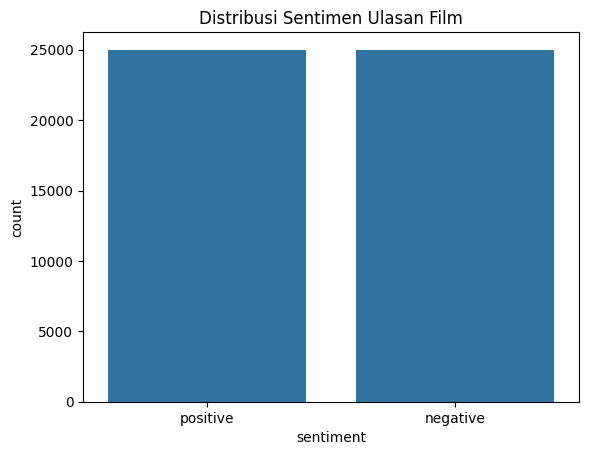

In [3]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

# Tampilkan 5 baris pertama
print("Data Head:")
print(df.head())

# Lihat distribusi sentimen
print("\nDistribusi Sentimen:")
print(df['sentiment'].value_counts())

# Visualisasikan distribusi
sns.countplot(x='sentiment', data=df)
plt.title('Distribusi Sentimen Ulasan Film')
plt.show()

## 3. Preprocessing Teks
Teks mentah tidak bisa langsung dimasukkan ke model. Kita perlu membersihkannya terlebih dahulu. Proses ini meliputi:
*   Mengubah teks menjadi huruf kecil (lowercase).
*   Menghapus tag HTML.
*   Menghapus karakter non-alfabet (seperti tanda baca dan angka).
*   Menghapus spasi berlebih.

In [4]:
def preprocess_text(text):
    # Mengubah ke huruf kecil
    text = text.lower()
    # Menghapus tag HTML
    text = re.sub(r'<.*?>', '', text)
    # Menghapus karakter non-alfabet
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Menghapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Terapkan fungsi preprocessing ke kolom 'review'
df['cleaned_review'] = df['review'].apply(preprocess_text)

print("Contoh Teks Asli:")
print(df['review'][0])
print("\nContoh Teks Setelah Dibersihkan:")
print(df['cleaned_review'][0])

Contoh Teks Asli:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show

## 4. Vektorisasi: Mengubah Teks menjadi Angka
Model Machine Learning hanya mengerti angka. **TF-IDF (Term Frequency-Inverse Document Frequency)** adalah teknik populer untuk mengubah teks menjadi vektor numerik. TF-IDF akan mengukur seberapa penting sebuah kata dalam sebuah dokumen relatif terhadap keseluruhan koleksi dokumen (corpus).

In [5]:
# Inisialisasi TF-IDF Vectorizer
# max_features=5000 artinya kita hanya akan mengambil 5000 kata paling penting
# stop_words='english' akan menghapus kata-kata umum dalam bahasa Inggris (seperti 'the', 'a', 'is')
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Ubah teks menjadi fitur TF-IDF
X = tfidf.fit_transform(df['cleaned_review']).toarray()

# Ubah label sentimen menjadi angka (positive=1, negative=0)
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

print("Dimensi matriks fitur (X):", X.shape)
print("Dimensi vektor target (y):", y.shape)

Dimensi matriks fitur (X): (50000, 5000)
Dimensi vektor target (y): (50000,)


## 5. Membagi Data: Training dan Testing
Kita perlu membagi data kita menjadi dua bagian:

*   Data Training (80%): Untuk melatih model.
*   Data Testing (20%): Untuk menguji seberapa baik performa model pada data yang belum pernah dilihat sebelumnya.



In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Ukuran data training:", X_train.shape)
print("Ukuran data testing:", X_test.shape)

Ukuran data training: (40000, 5000)
Ukuran data testing: (10000, 5000)


## 6. Membangun dan Melatih Model
Kita akan menggunakan model klasifikasi sederhana namun kuat, yaitu **Logistic Regression**.

In [7]:
# Inisialisasi model
model = LogisticRegression(max_iter=1000)

# Latih model dengan data training
print("Melatih model...")
model.fit(X_train, y_train)
print("Model selesai dilatih!")

Melatih model...
Model selesai dilatih!


## 7. Evaluasi Model
Sekarang, kita evaluasi performa model menggunakan data testing. Kita akan melihat **akurasi** dan **confusion matrix.**

Akurasi Model: 88.65%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.88      0.89      5000
    Positive       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



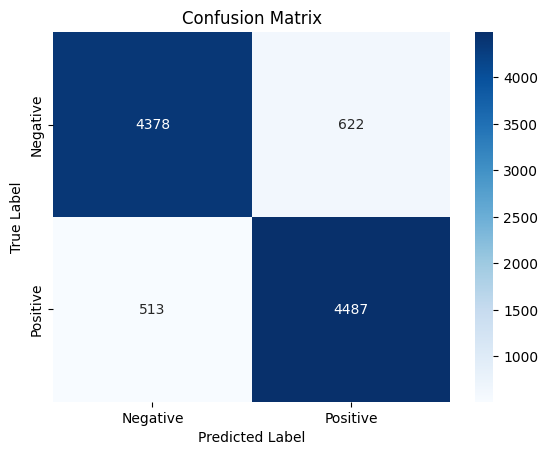

In [8]:
# Lakukan prediksi pada data test
y_pred = model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

# Tampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Tampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## 8. Tes dengan Ulasan Baru

In [9]:
def predict_sentiment(review_text):
    # 1. Bersihkan teks
    cleaned_text = preprocess_text(review_text)
    # 2. Ubah teks menjadi vektor TF-IDF
    vectorized_text = tfidf.transform([cleaned_text]).toarray()
    # 3. Lakukan prediksi
    prediction = model.predict(vectorized_text)
    # 4. Tampilkan hasil
    if prediction[0] == 1:
        print("Sentimen: Positif")
    else:
        print("Sentimen: Negatif")

# Uji coba
predict_sentiment("The acting was superb and the plot was thrilling.")
predict_sentiment("A complete waste of time.")

Sentimen: Positif
Sentimen: Negatif
